
📝 Instructions

🎞Movie Recommendation System
Would we be able to predict which movies could be a commercial success or not? This dataset compiles part of the knowledge from the TMDB API, containing only 5000 movies out of the total number. The following resources are available:

tmdb_5000_movies: https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/main/tmdb_5000_movies.csv

tmdb_5000_credits: https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/main/tmdb_5000_credits.csv

Step 1. Data Ingestion

In [1]:
import pandas as pd

movies = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/main/tmdb_5000_movies.csv")
credits = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/main/tmdb_5000_credits.csv")


In [2]:

movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies.to_csv(r"movies.csv", index=False)

In [5]:
credits.to_csv(r"credits.csv", index=False)

Step 2. Creating database

2.1 Creating movies and credits tables

In [6]:
# Paths of uploaded files
path_movies = '/workspace/K-nearest-neighbors-films-recomendation/data/raw/credits.csv'
path_credits = '/workspace/K-nearest-neighbors-films-recomendation/data/raw/credits.csv'

# Loading data into Pandas DataFrames
df_movies_uploaded = pd.read_csv(path_movies)
df_credits_uploaded = pd.read_csv(path_credits)

# Showing tables headers
df_movies_uploaded_head = df_movies_uploaded.head()
df_credits_uploaded_head = df_credits_uploaded.head()

df_movies_uploaded_head, df_credits_uploaded_head


(   movie_id                                     title  \
 0     19995                                    Avatar   
 1       285  Pirates of the Caribbean: At World's End   
 2    206647                                   Spectre   
 3     49026                     The Dark Knight Rises   
 4     49529                               John Carter   
 
                                                 cast  \
 0  [{"cast_id": 242, "character": "Jake Sully", "...   
 1  [{"cast_id": 4, "character": "Captain Jack Spa...   
 2  [{"cast_id": 1, "character": "James Bond", "cr...   
 3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
 4  [{"cast_id": 5, "character": "John Carter", "c...   
 
                                                 crew  
 0  [{"credit_id": "52fe48009251416c750aca23", "de...  
 1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
 2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
 3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
 4  [{"credit_id": "52fe47

In [7]:
df_credits_uploaded.info

<bound method DataFrame.info of       movie_id                                     title  \
0        19995                                    Avatar   
1          285  Pirates of the Caribbean: At World's End   
2       206647                                   Spectre   
3        49026                     The Dark Knight Rises   
4        49529                               John Carter   
...        ...                                       ...   
4798      9367                               El Mariachi   
4799     72766                                 Newlyweds   
4800    231617                 Signed, Sealed, Delivered   
4801    126186                          Shanghai Calling   
4802     25975                         My Date with Drew   

                                                   cast  \
0     [{"cast_id": 242, "character": "Jake Sully", "...   
1     [{"cast_id": 4, "character": "Captain Jack Spa...   
2     [{"cast_id": 1, "character": "James Bond", "cr...   
3     [{"ca

In [8]:
df_movies_uploaded.columns


Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

Merging using SQL to create a third table. I will use the title of the movie as a key to the connection.

The union of the "movies" and "credits" tables has been carried out successfully, creating a new DataFrame that contains the requested columns: movie_id, title, overview, genres, keywords, cast, and crew.

In [9]:
import sqlite3

conn = sqlite3.connect("../data/movies_database.db")

movies.to_sql("movies_table", conn, if_exists = "replace", index = False)
credits.to_sql("credits_table", conn, if_exists = "replace", index = False)

4803

In [10]:
# Merge tables for creating a new DataFrame

query = """
    SELECT *
    FROM movies_table
    INNER JOIN credits_table
    ON movies_table.title = credits_table.title;
"""

total_data = pd.read_sql_query(query, conn)
conn.close()

total_data = total_data.loc[:, ~total_data.columns.duplicated()]
total_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Step 3. Data transformation

In [11]:
# Data transform as expected
import json

def load_json_safe(json_str, default_value = None):
    try:
        return json.loads(json_str)
    except (TypeError, json.JSONDecodeError):
        return default_value
    
total_data["genres"] = total_data["genres"].apply(lambda x: [item["name"] for item in json.loads(x)] if pd.notna(x) else None)
total_data["keywords"] = total_data["keywords"].apply(lambda x: [item["name"] for item in json.loads(x)] if pd.notna(x) else None)
total_data["cast"] = total_data["cast"].apply(lambda x: [item["name"] for item in json.loads(x)][:3] if pd.notna(x) else None)
total_data["crew"] = total_data["crew"].apply(lambda x: " ".join([crew_member['name'] for crew_member in load_json_safe(x) if crew_member['job'] == 'Director']))
total_data["overview"] = total_data["overview"].apply(lambda x: [x])

total_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"[In the 22nd century, a paraplegic Marine is d...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"[Captain Barbossa, long believed to be dead, h...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,[A cryptic message from Bond’s past sends him ...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,[Following the death of District Attorney Harv...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"[John Carter is a war-weary, former military c...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton


In [12]:
'''# Functions for data transformation
import json 
def extract_names_from_json(json_str):
    return [item['name'] for item in json.loads(json_str)]

def extract_cast_names(json_str):
    cast_list = json.loads(json_str)
    return [cast['name'] for cast in cast_list[:3]]  # Primeros tres actores

def extract_director_name(json_str):
    crew_list = json.loads(json_str)
    for crew_member in crew_list:
        if crew_member['job'] == 'Director':
            return crew_member['name']
    return None

# Transforming the 'genres' and 'keywords' columns
total_data['genres'] = total_data['genres'].apply(extract_names_from_json)
total_data['keywords'] = total_data['keywords'].apply(extract_names_from_json)

# Transforming the 'cast' column
total_data['cast'] = total_data['cast'].apply(extract_cast_names)

# Transforming 'crew' column to get just the director name
total_data['crew'] = total_data['crew'].apply(extract_director_name)

# Converting 'overview' column to a list of words
total_data['overview'] = total_data['overview'].apply(lambda x: x.split() if isinstance(x, str) else [])

# Show changes
print(total_data[['genres', 'keywords', 'cast', 'crew', 'overview']].head())'''


"# Functions for data transformation\nimport json \ndef extract_names_from_json(json_str):\n    return [item['name'] for item in json.loads(json_str)]\n\ndef extract_cast_names(json_str):\n    cast_list = json.loads(json_str)\n    return [cast['name'] for cast in cast_list[:3]]  # Primeros tres actores\n\ndef extract_director_name(json_str):\n    crew_list = json.loads(json_str)\n    for crew_member in crew_list:\n        if crew_member['job'] == 'Director':\n            return crew_member['name']\n    return None\n\n# Transforming the 'genres' and 'keywords' columns\ntotal_data['genres'] = total_data['genres'].apply(extract_names_from_json)\ntotal_data['keywords'] = total_data['keywords'].apply(extract_names_from_json)\n\n# Transforming the 'cast' column\ntotal_data['cast'] = total_data['cast'].apply(extract_cast_names)\n\n# Transforming 'crew' column to get just the director name\ntotal_data['crew'] = total_data['crew'].apply(extract_director_name)\n\n# Converting 'overview' column t

In [13]:
# Define a lambda function to remove spaces from a list or string
remove_spaces_lambda = lambda items: [item.replace(" ", "") for item in items] if isinstance(items, list) else items

# Apply transformations to columns
total_data['genres'] = total_data['genres'].apply(remove_spaces_lambda)
total_data['cast'] = total_data['cast'].apply(remove_spaces_lambda)
total_data['crew'] = total_data['crew'].apply(lambda x: x.replace(" ", "") if x else x)
total_data['keywords'] = total_data['keywords'].apply(remove_spaces_lambda)

# Show changes
print(total_data[['genres', 'cast', 'crew', 'keywords']].head())

                                         genres  \
0  [Action, Adventure, Fantasy, ScienceFiction]   
1                  [Adventure, Fantasy, Action]   
2                    [Action, Adventure, Crime]   
3              [Action, Crime, Drama, Thriller]   
4           [Action, Adventure, ScienceFiction]   

                                            cast              crew  \
0  [SamWorthington, ZoeSaldana, SigourneyWeaver]      JamesCameron   
1     [JohnnyDepp, OrlandoBloom, KeiraKnightley]     GoreVerbinski   
2      [DanielCraig, ChristophWaltz, LéaSeydoux]         SamMendes   
3      [ChristianBale, MichaelCaine, GaryOldman]  ChristopherNolan   
4    [TaylorKitsch, LynnCollins, SamanthaMorton]     AndrewStanton   

                                            keywords  
0  [cultureclash, future, spacewar, spacecolony, ...  
1  [ocean, drugabuse, exoticisland, eastindiatrad...  
2  [spy, basedonnovel, secretagent, sequel, mi6, ...  
3  [dccomics, crimefighter, terrorist, secretiden...

In [14]:
# # Define a lambda function to clean and join lists
clean_and_join_lambda = lambda lst: ' '.join(str(item) for item in lst).replace('[', '').replace(']', '').replace("'", '').replace(',', '') if lst is not None else ''

# Apply the transformations to the columns and combine them in the 'tags' column
total_data['tags'] = total_data['overview'].apply(lambda x: clean_and_join_lambda(x)) + ' ' + \
                     total_data['genres'].apply(lambda x: clean_and_join_lambda(x)) + ' ' + \
                     total_data['keywords'].apply(lambda x: clean_and_join_lambda(x)) + ' ' + \
                     total_data['cast'].apply(lambda x: clean_and_join_lambda(x)) + ' ' + \
                     total_data['crew'].apply(lambda x: clean_and_join_lambda(x))

# Show the first element of the 'tags' column to verify
print(total_data['tags'].iloc[0])



In the 22nd century a paraplegic Marine is dispatched to the moon Pandora on a unique mission but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver J a m e s C a m e r o n


Step 4. Creating a KNN model

4.1 Text Vectorizing

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating the TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Vectorizing the 'tags' column
tfidf_matrix = tfidf.fit_transform(total_data['tags'])


4.2 Aplying KNN Model

In [16]:
from sklearn.neighbors import NearestNeighbors

# Creating the KNN model
model = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='cosine')
model.fit(tfidf_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [17]:
import pickle

# Save the KNN model to a file
with open('/workspace/K-nearest-neighbors-films-recomendation/models/knn_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Now the KNN model has been saved in the file knn_model.pkl

Movie List Consulting

In [18]:
show_movie_list = lambda: print("List of movies in the database:\n- " + "\n- ".join(total_data["title"]))
show_movie_list()


List of movies in the database:
- Avatar
- Pirates of the Caribbean: At World's End
- Spectre
- The Dark Knight Rises
- John Carter
- Spider-Man 3
- Tangled
- Avengers: Age of Ultron
- Harry Potter and the Half-Blood Prince
- Batman v Superman: Dawn of Justice
- Superman Returns
- Quantum of Solace
- Pirates of the Caribbean: Dead Man's Chest
- The Lone Ranger
- Man of Steel
- The Chronicles of Narnia: Prince Caspian
- The Avengers
- Pirates of the Caribbean: On Stranger Tides
- Men in Black 3
- The Hobbit: The Battle of the Five Armies
- The Amazing Spider-Man
- Robin Hood
- The Hobbit: The Desolation of Smaug
- The Golden Compass
- King Kong
- Titanic
- Captain America: Civil War
- Battleship
- Jurassic World
- Skyfall
- Spider-Man 2
- Iron Man 3
- Alice in Wonderland
- X-Men: The Last Stand
- Monsters University
- Transformers: Revenge of the Fallen
- Transformers: Age of Extinction
- Oz: The Great and Powerful
- The Amazing Spider-Man 2
- TRON: Legacy
- Cars 2
- Green Lantern
- Toy

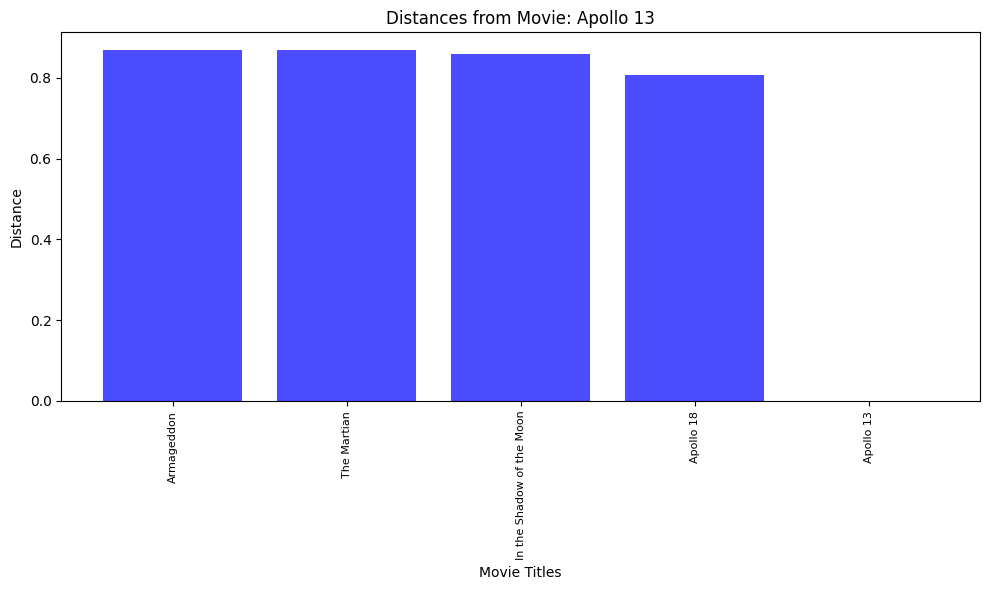


Movie recommendations for 'Apollo 13':
- Movie: Armageddon
- Movie: The Martian
- Movie: In the Shadow of the Moon
- Movie: Apollo 18


In [20]:
import matplotlib.pyplot as plt

def get_movie_recommendations(tfidf_matrix, model, user_input, total_data):
    movie_indices = total_data.index[total_data["title"] == user_input].tolist()
    
    if not movie_indices:
        print(f"Sorry, the movie '{user_input}' is not found in the database.")
        return []

    movie_index = movie_indices[0]
    distances, indices = model.kneighbors(tfidf_matrix[movie_index])
    
    similar_movies = [(total_data["title"][i], distances[0][j]) for j, i in enumerate(indices[0])]
    similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)
    
    recommended_movies = [movie[0] for movie in similar_movies if movie[0] != user_input]
    
    # Plot a histogram of distances with movie titles as labels
    plt.figure(figsize=(10, 6))
    plt.bar([movie[0] for movie in similar_movies], [movie[1] for movie in similar_movies], color='blue', alpha=0.7)
    plt.xlabel('Movie Titles')
    plt.ylabel('Distance')
    plt.title(f'Distances from Movie: {user_input}')
    plt.xticks(rotation=90, fontsize=8)
    plt.tight_layout()
    plt.show()

    return recommended_movies

def main():
    while True:
        user_input = input("Enter the title of the movie to get recommendations (or 'exit' to quit): ")
        if user_input.lower() == 'exit':
            break
        recommendations = get_movie_recommendations(tfidf_matrix, model, user_input, total_data)
        if recommendations:
            print("\nMovie recommendations for '{}':".format(user_input))
            for movie in recommendations:
                print("- Movie: {}".format(movie))

if __name__ == "__main__":
    main()
